In [18]:
import zipfile
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
try:
    zip_path = "c:\\Users\\ANANDITO\\Documents\\KULIAH\\Telkom University\\Semester 6\\BANGKIT\\machine-learning-kaisar\\grade_prediction\\dataset\\food_facts_clean.zip"
    with zipfile.ZipFile(zip_path, 'r') as z:
        print(z.namelist())
    
        with z.open('food_facts_clean.csv') as f:
            df = pd.read_csv(f, on_bad_lines='skip', sep='\t')

except FileNotFoundError as e:
    print("File not found. Please check the path.")
    print(e)
except Exception as e:
    print("An error occurred.")
    print(e)

['food_facts_clean.csv']


C:\Users\ANANDITO\AppData\Local\Temp\ipykernel_26380\236274930.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, on_bad_lines='skip', sep='\t')


In [20]:
print(df.head())
print(df.info())

            code                                          states_en  \
0  3760029248001  To be checked,Complete,Nutrition facts complet...   
1  3029330062806  To be completed,Nutrition facts completed,Ingr...   
2  3257980112590  To be completed,Nutrition facts completed,Ingr...   
3  3017760038409  To be completed,Nutrition facts completed,Ingr...   
4  3160181210524  To be checked,Complete,Nutrition facts complet...   

                                                 url     created_datetime  \
0  http://world-en.openfoodfacts.org/product/3760...  2012-01-31 14:43:58   
1  http://world-en.openfoodfacts.org/product/3029...  2012-02-09 10:34:56   
2  http://world-en.openfoodfacts.org/product/3257...  2012-02-11 14:51:07   
3  http://world-en.openfoodfacts.org/product/3017...  2012-02-11 15:07:23   
4  http://world-en.openfoodfacts.org/product/3160...  2012-02-11 18:51:58   

  last_modified_datetime   creator       pnns_groups_2  \
0    2018-08-30 21:14:54  stephane              swee

In [21]:
df_ad = df.drop(columns=['code', 'states_en', 'url', 'created_datetime', 'last_modified_datetime', 'creator', 'pnns_groups_2', 'countries_en', 'pnns_groups_1', 'product_name', 'categories_en', 'main_category_en', 'nutriscore_score'])

In [22]:
print(df_ad.head())
print(df_ad.info())

   energy_100g  proteins_100g  fat_100g  carbohydrates_100g  sugars_100g  \
0       1717.0            3.0      10.9                73.5         49.3   
1       1898.0            8.5      15.5                68.0          2.0   
2       1615.0            6.9       3.2                80.4         51.8   
3       1487.0            3.8       2.0                78.0         58.0   
4       2040.0            7.0      25.0                56.0         33.0   

   salt_100g  sodium_100g  saturated-fat_100g nutriscore_grade  fiber_100g  \
0     1.7000      0.68000                 7.0                e         1.0   
1     1.7526      0.70104                 1.3                c         3.0   
2     0.0900      0.03600                 1.2                d         1.6   
3     0.0900      0.03600                 0.6                d         1.7   
4     0.3810      0.15240                14.0                e         5.5   

   fruits-vegetables-rate_100g  
0                           25  
1       

In [23]:
print(df_ad.isnull().sum())

energy_100g                         0
proteins_100g                       0
fat_100g                            0
carbohydrates_100g                  0
sugars_100g                         0
salt_100g                           0
sodium_100g                         0
saturated-fat_100g                  0
nutriscore_grade               556150
fiber_100g                          0
fruits-vegetables-rate_100g         0
dtype: int64


In [24]:
df_clean = df_ad.dropna()
print(df_clean.isnull().sum())

energy_100g                    0
proteins_100g                  0
fat_100g                       0
carbohydrates_100g             0
sugars_100g                    0
salt_100g                      0
sodium_100g                    0
saturated-fat_100g             0
nutriscore_grade               0
fiber_100g                     0
fruits-vegetables-rate_100g    0
dtype: int64


C:\Users\ANANDITO\AppData\Local\Temp\ipykernel_26380\1388319186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['nutriscore_grade'] = df_clean['nutriscore_grade'].map(mapping)


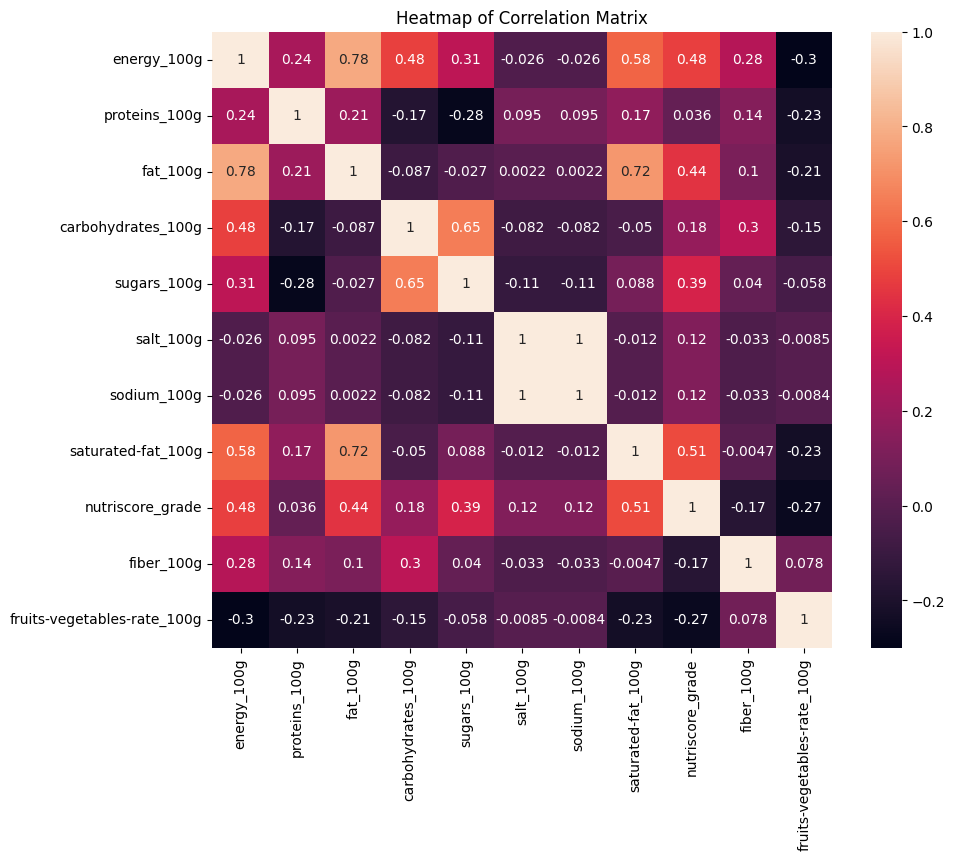

C:\Users\ANANDITO\AppData\Local\Temp\ipykernel_26380\1388319186.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['nutriscore_grade'] = df_clean['nutriscore_grade'].map(mapping)


In [25]:
mapping = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}
df_clean['nutriscore_grade'] = df_clean['nutriscore_grade'].map(mapping)

correlation_matrix = df_clean.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()

mapping = {1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e'}
df_clean['nutriscore_grade'] = df_clean['nutriscore_grade'].map(mapping)

In [26]:
df_clean = df_clean.drop(columns=['fruits-vegetables-rate_100g', 'salt_100g'])

In [27]:
print(df_clean.head())
print(df_clean.info())

   energy_100g  proteins_100g  fat_100g  carbohydrates_100g  sugars_100g  \
0       1717.0            3.0      10.9                73.5         49.3   
1       1898.0            8.5      15.5                68.0          2.0   
2       1615.0            6.9       3.2                80.4         51.8   
3       1487.0            3.8       2.0                78.0         58.0   
4       2040.0            7.0      25.0                56.0         33.0   

   sodium_100g  saturated-fat_100g nutriscore_grade  fiber_100g  
0      0.68000                 7.0                e         1.0  
1      0.70104                 1.3                c         3.0  
2      0.03600                 1.2                d         1.6  
3      0.03600                 0.6                d         1.7  
4      0.15240                14.0                e         5.5  
<class 'pandas.core.frame.DataFrame'>
Index: 522952 entries, 0 to 1078834
Data columns (total 9 columns):
 #   Column              Non-Null Count  

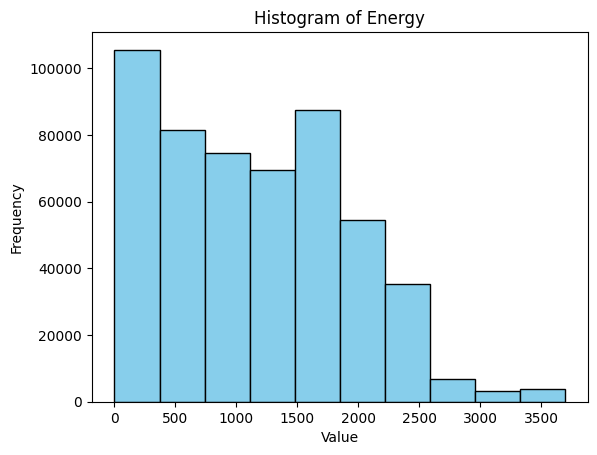

In [28]:
df_clean['energy_100g'].plot.hist(bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Energy')
plt.show()

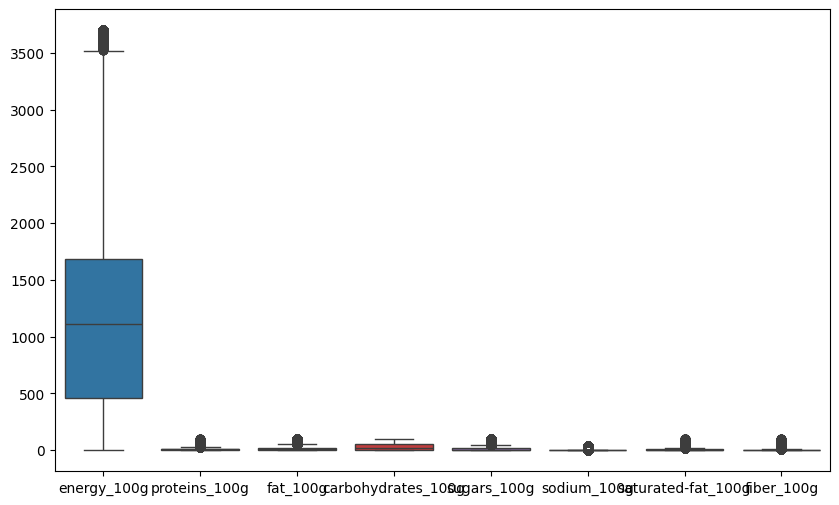

In [29]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(data=df_clean) 
plt.show()

In [30]:
kol = ["energy_100g", "proteins_100g", "fat_100g", "carbohydrates_100g", "sugars_100g", "sodium_100g", "saturated-fat_100g", "fiber_100g"]

In [31]:
for k in kol:
    if k == "energy_100g":
        print(f"{k} with mean: {df_clean[k].mean()}")
    else:
        print(f"{k} with median: {df_clean[k].median()}")

energy_100g with mean: 1155.7149605219163
proteins_100g with median: 6.1
fat_100g with median: 7.8
carbohydrates_100g with median: 17.86
sugars_100g with median: 4.2
sodium_100g with median: 0.24
saturated-fat_100g with median: 2.0
fiber_100g with median: 1.5


In [12]:
def remove_outlier(df, kolom):
    Q1 = df[kolom].quantile(0.25)
    Q3 = df[kolom].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + (1.5 * IQR)
    lower = Q1 - (1.5 * IQR)
    return df[(df[kolom] < upper) & (df[kolom] > lower)]

In [13]:
def replace_outliers_with_median_mean(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median_value = df[column].median()
    mean_value = df[column].mean()

    if column == "energy_100g":
        df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = mean_value
    else:
        df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = median_value
    
    return df

In [14]:
for k in kol:
  #df_clean = remove_outlier(df_clean, k)
  df_clean = replace_outliers_with_median_mean(df_clean, k)

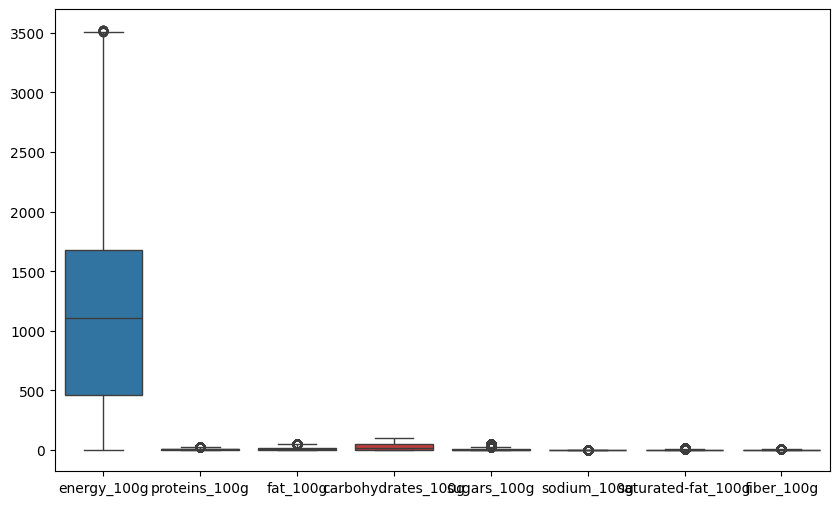

In [15]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(data=df_clean) 
plt.show()

In [142]:
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 522952 entries, 0 to 1078834
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   energy_100g         522952 non-null  float64
 1   proteins_100g       522952 non-null  float64
 2   fat_100g            522952 non-null  float64
 3   carbohydrates_100g  522952 non-null  float64
 4   sugars_100g         522952 non-null  float64
 5   sodium_100g         522952 non-null  float64
 6   saturated-fat_100g  522952 non-null  float64
 7   nutriscore_grade    522952 non-null  object 
 8   fiber_100g          522952 non-null  float64
dtypes: float64(8), object(1)
memory usage: 39.9+ MB
None


In [143]:
X = df_clean.drop(columns=['nutriscore_grade'])
y = df_clean['nutriscore_grade']

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
scaler = MinMaxScaler()
x_train_norm = scaler.fit_transform(X_train)
x_test_norm = scaler.transform(X_test)

In [155]:
import joblib

joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [146]:
mapping = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5}
y_train = y_train.map(mapping)
y_test = y_test.map(mapping)

In [147]:
num_classes = len(np.unique(list(mapping.values())))
y_train_norm = tf.keras.utils.to_categorical(y_train - 1, num_classes) 
y_test_norm = tf.keras.utils.to_categorical(y_test - 1, num_classes)

In [148]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',  
    patience=7, 
    restore_best_weights=True 
)

In [149]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(x_train_norm.shape[1],)),
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(num_classes, activation='softmax') 
])

In [150]:
model.compile(optimizer=tf.keras.optimizers.Nadam(),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [151]:
history = model.fit(x_train_norm, y_train_norm, epochs=50, validation_data=(x_test_norm, y_test_norm), callbacks=[early_stopping])

Epoch 1/50
13074/13074 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - accuracy: 0.6599 - loss: 0.8547 - val_accuracy: 0.7400 - val_loss: 0.6649
Epoch 2/50
13074/13074 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.7537 - loss: 0.6400 - val_accuracy: 0.7687 - val_loss: 0.5960
Epoch 3/50
13074/13074 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.7754 - loss: 0.5813 - val_accuracy: 0.7855 - val_loss: 0.5554
Epoch 4/50
13074/13074 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.7881 - loss: 0.5498 - val_accuracy: 0.8009 - val_loss: 0.5194
Epoch 5/50
13074/13074 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.7963 - loss: 0.5285 - val_accuracy: 0.8022 - val_loss: 0.5093
Epoch 6/50
13074/13074 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.8028 - loss: 0.5107 - val_accuracy: 0.8099 - val_loss: 0.4904
Epoch 7/50
13074/13074 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 0.8098 - loss: 0.4913 - val_accuracy: 0.8134 - val_loss: 0.4847
Epoch 8/50
13074/13074 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - accuracy: 

3269/3269 ━━━━━━━━━━━━━━━━━━━━ 2s 690us/step - accuracy: 0.8606 - loss: 0.3706
Test loss: 0.37136587500572205
Test accuracy: 0.8608197569847107


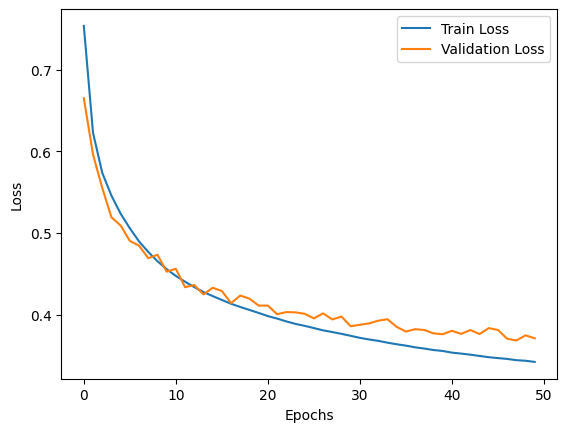

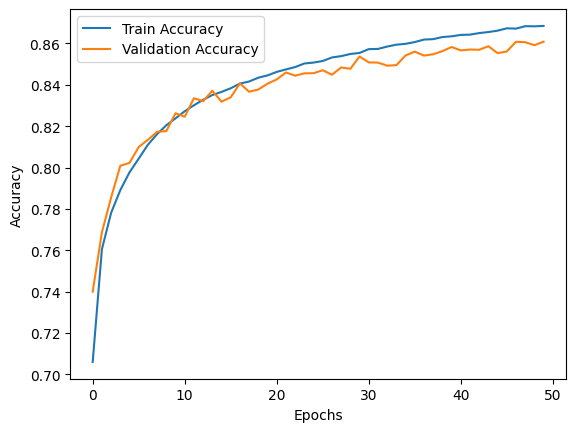

In [153]:
loss, accuracy = model.evaluate(x_test_norm, y_test_norm)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [154]:
model.save("model_grade_predict_dum.h5")

In [156]:
from keras.models import load_model

model_load = load_model('C:\\Users\\ANANDITO\\Documents\\KULIAH\\Telkom University\\Semester 6\\BANGKIT\\machine-learning-kaisar\\grade_prediction\\model_grade_predict_dum.h5')
scaler_load = joblib.load('C:\\Users\\ANANDITO\\Documents\\KULIAH\\Telkom University\\Semester 6\\BANGKIT\\machine-learning-kaisar\\grade_prediction\\scaler.joblib')

layers = model.layers

# Mendapatkan input layer pertama
input_layer = model.layers[0]

# Mengecek tipe dan bentuk dari input layer
print(f'Type of input layer: {type(input_layer)}')
print(f'Input shape of model: {model.input_shape}')

Type of input layer: <class 'keras.src.layers.core.dense.Dense'>
Input shape of model: (None, 8)


In [166]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_test_norm)
y_pred_classes = np.argmax(y_pred, axis=-1)
y_test_classes = np.argmax(y_test_norm, axis=-1)

3269/3269 ━━━━━━━━━━━━━━━━━━━━ 2s 710us/step


In [167]:
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Menghitung classification report (precision, recall, f1-score)
class_report = classification_report(y_test_classes, y_pred_classes)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[14885  1181   398    62   112]
 [ 1515 10103  1426   249   253]
 [  619  1267 18029  2152   256]
 [  161   190  1252 29553  1140]
 [  217   221   510  1376 17464]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     16638
           1       0.78      0.75      0.76     13546
           2       0.83      0.81      0.82     22323
           3       0.89      0.92      0.90     32296
           4       0.91      0.88      0.90     19788

    accuracy                           0.86    104591
   macro avg       0.85      0.85      0.85    104591
weighted avg       0.86      0.86      0.86    104591



In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,784 (171.04 KB)

 Trainable params: 43,781 (171.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3 (16.00 B)

In [62]:
print(model.get_config())


{'name': 'sequential', 'trainable': True, 'dtype': 'float32', 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': (None, 8), 'dtype': 'float32', 'sparse': False, 'name': 'input_layer'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'dtype': 'float32', 'units': 256, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': None, 'bias_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}, 'registered_name': None, 'build_config': {'input_shape': (None, 8)}}, {'module': 'keras.layers', 'class_name': 'Dense', 'config': {'name': 'dense_1', 'trainable': True, 'dtype': 'float32', 'units': 128, 'activation':

In [160]:
def predict_nutriscore(model_load, energy_100g, proteins_100g, fat_100g, carbohydrates_100g, sugars_100g, sodium_100g, saturated_fat_100g, fiber_100g):
    """
    Predicts nutriscore_grade based on input nutritional values using a trained model.

    Parameters:
    - model: Trained machine learning model (loaded from .h5 file).
    - energy_100g: Energy value per 100g.
    - proteins_100g: Proteins value per 100g.
    - fat_100g: Fat value per 100g.
    - carbohydrates_100g: Carbohydrates value per 100g.
    - sugars_100g: Sugars value per 100g.
    - sodium_100g: Sodium value per 100g.
    - saturated_fat_100g: Saturated fat value per 100g.
    - fiber_100g: Fiber value per 100g.

    Returns:
    - nutriscore_grade_pred: Predicted nutriscore_grade.
    """
    # Create input array for prediction
    X = np.array([[energy_100g, proteins_100g, fat_100g, carbohydrates_100g, sugars_100g, sodium_100g, saturated_fat_100g, fiber_100g]])
    print(X)
    # Normalization using MinMaxScaler
    X_scaled = scaler_load.transform(X)
    print(X_scaled)

    # Perform prediction
    nutriscore_grade_pred = model_load.predict(X_scaled)
    print(nutriscore_grade_pred)

    # Extract predicted class (assuming single output)
    predicted_grade = np.argmax(nutriscore_grade_pred, axis=-1)

    # Return the predicted grade
    return predicted_grade[0]

In [173]:
energy = 381.0
proteins = 8.1
fat = 0.0
carbohydrates = 13.4
sugars = 12.8
sodium = 0.1
saturated_fat = 0
fiber = 0

# Perform prediction using the loaded model
predicted = predict_nutriscore(model, energy, proteins, fat, carbohydrates, sugars, sodium, saturated_fat, fiber)

if predicted == 0:
    predicted = 'a'
elif predicted == 1:
    predicted = 'b'
elif predicted == 2:
    predicted = 'c'
elif predicted == 3:
    predicted = 'd'
else:
    predicted = 'e'

print(f'Predicted nutriscore_grade: {predicted}')

[[3.81e+02 8.10e+00 0.00e+00 1.34e+01 1.28e+01 1.00e-01 0.00e+00 0.00e+00]]
[[0.10823864 0.3        0.         0.134      0.26391753 0.08032129
  0.         0.        ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[7.4268126e-01 2.5223070e-01 2.2860074e-04 2.7788344e-06 4.8566745e-03]]
Predicted nutriscore_grade: a


c:\Users\ANANDITO\.conda\envs\fp-modsim\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
